# FLIGHT DELAYS PREDICTION

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## LOADING DATASET

In [2]:
data=pd.read_csv("C:\\Users\\CodeTantra\\Downloads\\archive\\Airlines.csv")

In [3]:
data.head()

id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0

In [4]:
data.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [5]:
data.tail()

id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
539378  539379      CO     178         OGG       SNA          5  1439     326   
539379  539380      FL     398         SEA       ATL          5  1439     305   
539380  539381      FL     609         SFO       MKE          5  1439     255   
539381  539382      UA      78         HNL       SFO          5  1439     313   
539382  539383      US    1442         LAX       PHL          5  1439     301   

        Delay  
539378      0  
539379      0  
539380      0  
539381      1  
539382      1

In [6]:
data.sample()

id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
381838  381839      UA     841         LAX       SFO          3  1178      84   

        Delay  
381838      1

In [7]:
data.shape

(539383, 9)

## converting data

In [8]:
#converting data categorical to numeric
label_encoder = LabelEncoder()
data['Airline_encoded'] = label_encoder.fit_transform(data['Airline'])
data['AirportFrom_encoded'] = label_encoder.fit_transform(data['AirportFrom'])
data['AirportTo_encoded'] = label_encoder.fit_transform(data['AirportTo'])

In [9]:
data

id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
0            1      CO     269         SFO       IAH          3    15     205   
1            2      US    1558         PHX       CLT          3    15     222   
2            3      AA    2400         LAX       DFW          3    20     165   
3            4      AA    2466         SFO       DFW          3    20     195   
4            5      AS     108         ANC       SEA          3    30     202   
...        ...     ...     ...         ...       ...        ...   ...     ...   
539378  539379      CO     178         OGG       SNA          5  1439     326   
539379  539380      FL     398         SEA       ATL          5  1439     305   
539380  539381      FL     609         SFO       MKE          5  1439     255   
539381  539382      UA      78         HNL       SFO          5  1439     313   
539382  539383      US    1442         LAX       PHL          5  1439     301   

        Delay  Airline_encoded  AirportFrom_encoded  AirportTo_encoded  
0           1                4                  253                135  
1           1               14                  217                 60  
2           1                1                  154                 80  
3           1                1                  253                 80  
4           0                2                   14                252  
...       ...              ...                  ...                ...  
539378      0                4                  203                264  
539379      0                8                  252                 16  
539380      0                8                  253                184  
539381      1               13                  128                253  
539382      1               14                  154                216  

[539383 rows x 12 columns]

In [10]:
#droping columns
sel=data[["id","Airline_encoded","Flight","AirportFrom_encoded","AirportTo_encoded","DayOfWeek","Time","Length","Delay"]]
print(sel)

            id  Airline_encoded  Flight  AirportFrom_encoded  \
0            1                4     269                  253   
1            2               14    1558                  217   
2            3                1    2400                  154   
3            4                1    2466                  253   
4            5                2     108                   14   
...        ...              ...     ...                  ...   
539378  539379                4     178                  203   
539379  539380                8     398                  252   
539380  539381                8     609                  253   
539381  539382               13      78                  128   
539382  539383               14    1442                  154   

        AirportTo_encoded  DayOfWeek  Time  Length  Delay  
0                     135          3    15     205      1  
1                      60          3    15     222      1  
2                      80          3    20     165 

In [11]:
sel.head()

id  Airline_encoded  Flight  AirportFrom_encoded  AirportTo_encoded  \
0   1                4     269                  253                135   
1   2               14    1558                  217                 60   
2   3                1    2400                  154                 80   
3   4                1    2466                  253                 80   
4   5                2     108                   14                252   

   DayOfWeek  Time  Length  Delay  
0          3    15     205      1  
1          3    15     222      1  
2          3    20     165      1  
3          3    20     195      1  
4          3    30     202      0

In [12]:
sel.tail()

id  Airline_encoded  Flight  AirportFrom_encoded  \
539378  539379                4     178                  203   
539379  539380                8     398                  252   
539380  539381                8     609                  253   
539381  539382               13      78                  128   
539382  539383               14    1442                  154   

        AirportTo_encoded  DayOfWeek  Time  Length  Delay  
539378                264          5  1439     326      0  
539379                 16          5  1439     305      0  
539380                184          5  1439     255      0  
539381                253          5  1439     313      1  
539382                216          5  1439     301      1

## Data Preprocessing

In [13]:
sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   id                   539383 non-null  int64
 1   Airline_encoded      539383 non-null  int64
 2   Flight               539383 non-null  int64
 3   AirportFrom_encoded  539383 non-null  int64
 4   AirportTo_encoded    539383 non-null  int64
 5   DayOfWeek            539383 non-null  int64
 6   Time                 539383 non-null  int64
 7   Length               539383 non-null  int64
 8   Delay                539383 non-null  int64
dtypes: int64(9)
memory usage: 37.0 MB


In [14]:
sel.isna().sum()

id                     0
Airline_encoded        0
Flight                 0
AirportFrom_encoded    0
AirportTo_encoded      0
DayOfWeek              0
Time                   0
Length                 0
Delay                  0
dtype: int64

In [15]:
sel.isnull

<bound method DataFrame.isnull of             id  Airline_encoded  Flight  AirportFrom_encoded  \
0            1                4     269                  253   
1            2               14    1558                  217   
2            3                1    2400                  154   
3            4                1    2466                  253   
4            5                2     108                   14   
...        ...              ...     ...                  ...   
539378  539379                4     178                  203   
539379  539380                8     398                  252   
539380  539381                8     609                  253   
539381  539382               13      78                  128   
539382  539383               14    1442                  154   

        AirportTo_encoded  DayOfWeek  Time  Length  Delay  
0                     135          3    15     205      1  
1                      60          3    15     222      1  
2                

In [16]:
sel.duplicated().sum()

np.int64(0)

In [17]:
# If duplicates exist remove duplicate values
sel=sel.drop_duplicates()

In [18]:
# statistical summary 
sel.describe()

id  Airline_encoded         Flight  AirportFrom_encoded  \
count  539383.000000    539383.000000  539383.000000        539383.000000   
mean   269692.000000         9.334527    2427.928630           144.116322   
std    155706.604461         5.306368    2067.429837            79.379776   
min         1.000000         0.000000       1.000000             0.000000   
25%    134846.500000         5.000000     712.000000            79.000000   
50%    269692.000000        10.000000    1809.000000           153.000000   
75%    404537.500000        15.000000    3745.000000           208.000000   
max    539383.000000        17.000000    7814.000000           292.000000   

       AirportTo_encoded      DayOfWeek           Time         Length  \
count      539383.000000  539383.000000  539383.000000  539383.000000   
mean          144.143162       3.929668     802.728963     132.202007   
std            79.353137       1.914664     278.045911      70.117016   
min             0.000000       1.000000      10.000000       0.000000   
25%            79.000000       2.000000     565.000000      81.000000   
50%           153.000000       4.000000     795.000000     115.000000   
75%           208.000000       5.000000    1035.000000     162.000000   
max           292.000000       7.000000    1439.000000     655.000000   

               Delay  
count  539383.000000  
mean        0.445442  
std         0.497015  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

# EDA

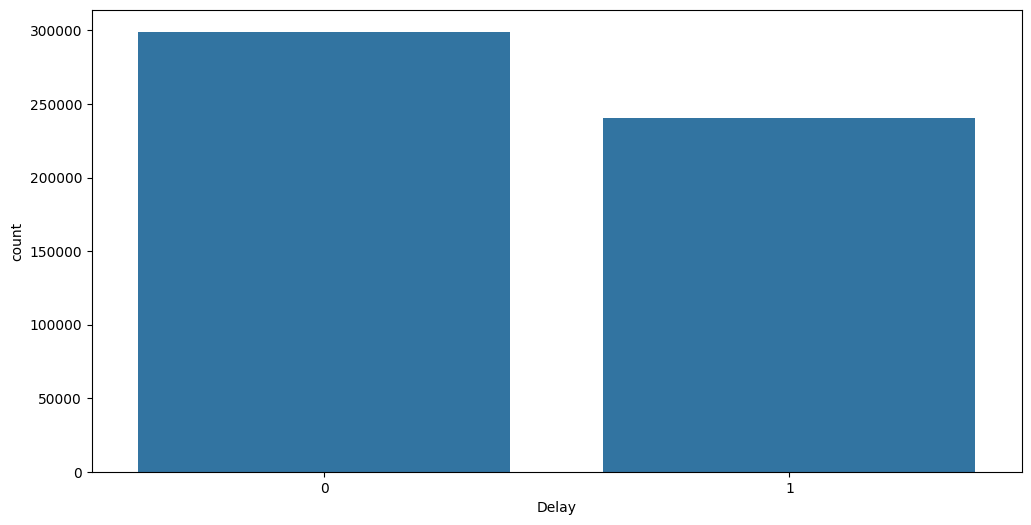

In [19]:
# counts no:of flight delays positive and negative(blue=negative,orange=positive)
plt.figure(figsize = (12,6))
sns.countplot(x = 'Delay', data = data)
plt.show()

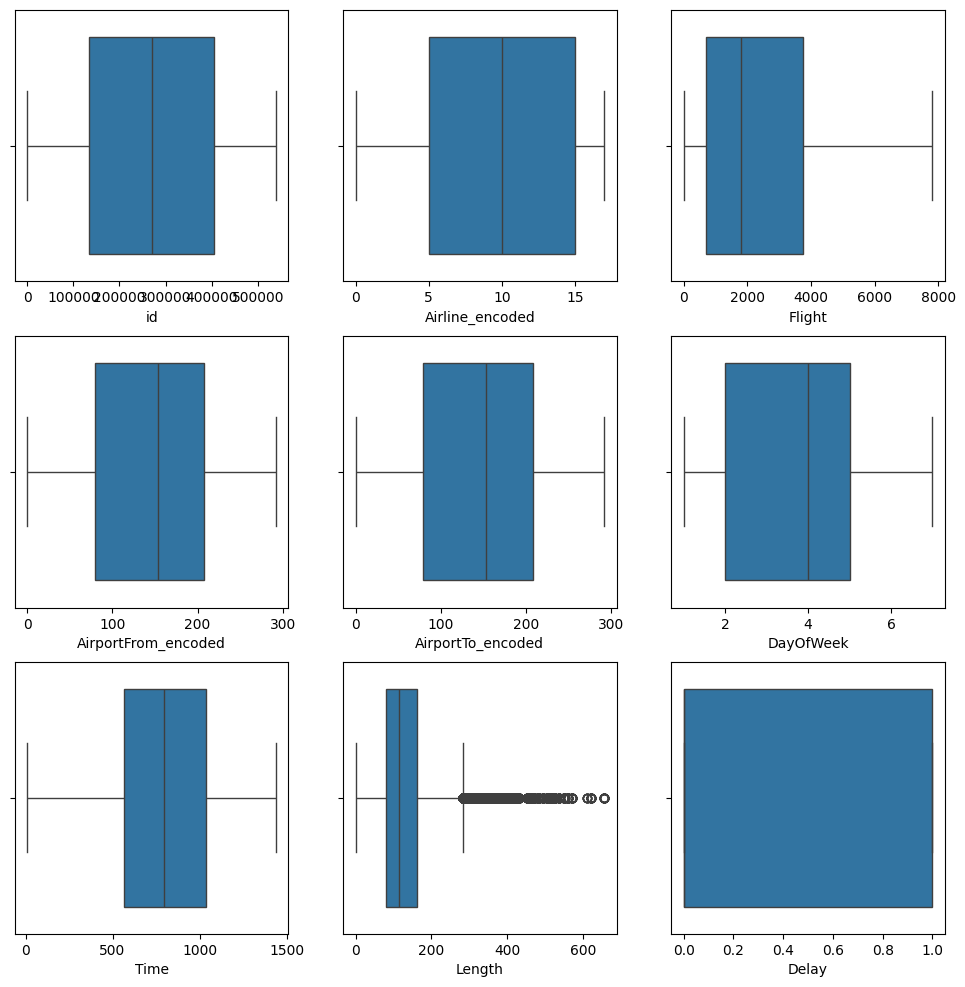

In [20]:
# subplot and boxplot are used to identify the outliers
plt.figure(figsize = (12,12))
for i, col in enumerate(['id','Airline_encoded','Flight','AirportFrom_encoded','AirportTo_encoded','DayOfWeek','Time','Length','Delay']):
        plt.subplot(3,3,i+1)
        sns.boxplot(x = col, data = data)
plt.show()

array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='Flight', ylabel='id'>,
        <Axes: xlabel='DayOfWeek', ylabel='id'>,
        <Axes: xlabel='Time', ylabel='id'>,
        <Axes: xlabel='Length', ylabel='id'>,
        <Axes: xlabel='Delay', ylabel='id'>,
        <Axes: xlabel='Airline_encoded', ylabel='id'>,
        <Axes: xlabel='AirportFrom_encoded', ylabel='id'>,
        <Axes: xlabel='AirportTo_encoded', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='Flight'>,
        <Axes: xlabel='Flight', ylabel='Flight'>,
        <Axes: xlabel='DayOfWeek', ylabel='Flight'>,
        <Axes: xlabel='Time', ylabel='Flight'>,
        <Axes: xlabel='Length', ylabel='Flight'>,
        <Axes: xlabel='Delay', ylabel='Flight'>,
        <Axes: xlabel='Airline_encoded', ylabel='Flight'>,
        <Axes: xlabel='AirportFrom_encoded', ylabel='Flight'>,
        <Axes: xlabel='AirportTo_encoded', ylabel='Flight'>],
       [<Axes: xlabel='id', ylabel='DayOfWeek'>,
        <Axes: xlabel='Flig

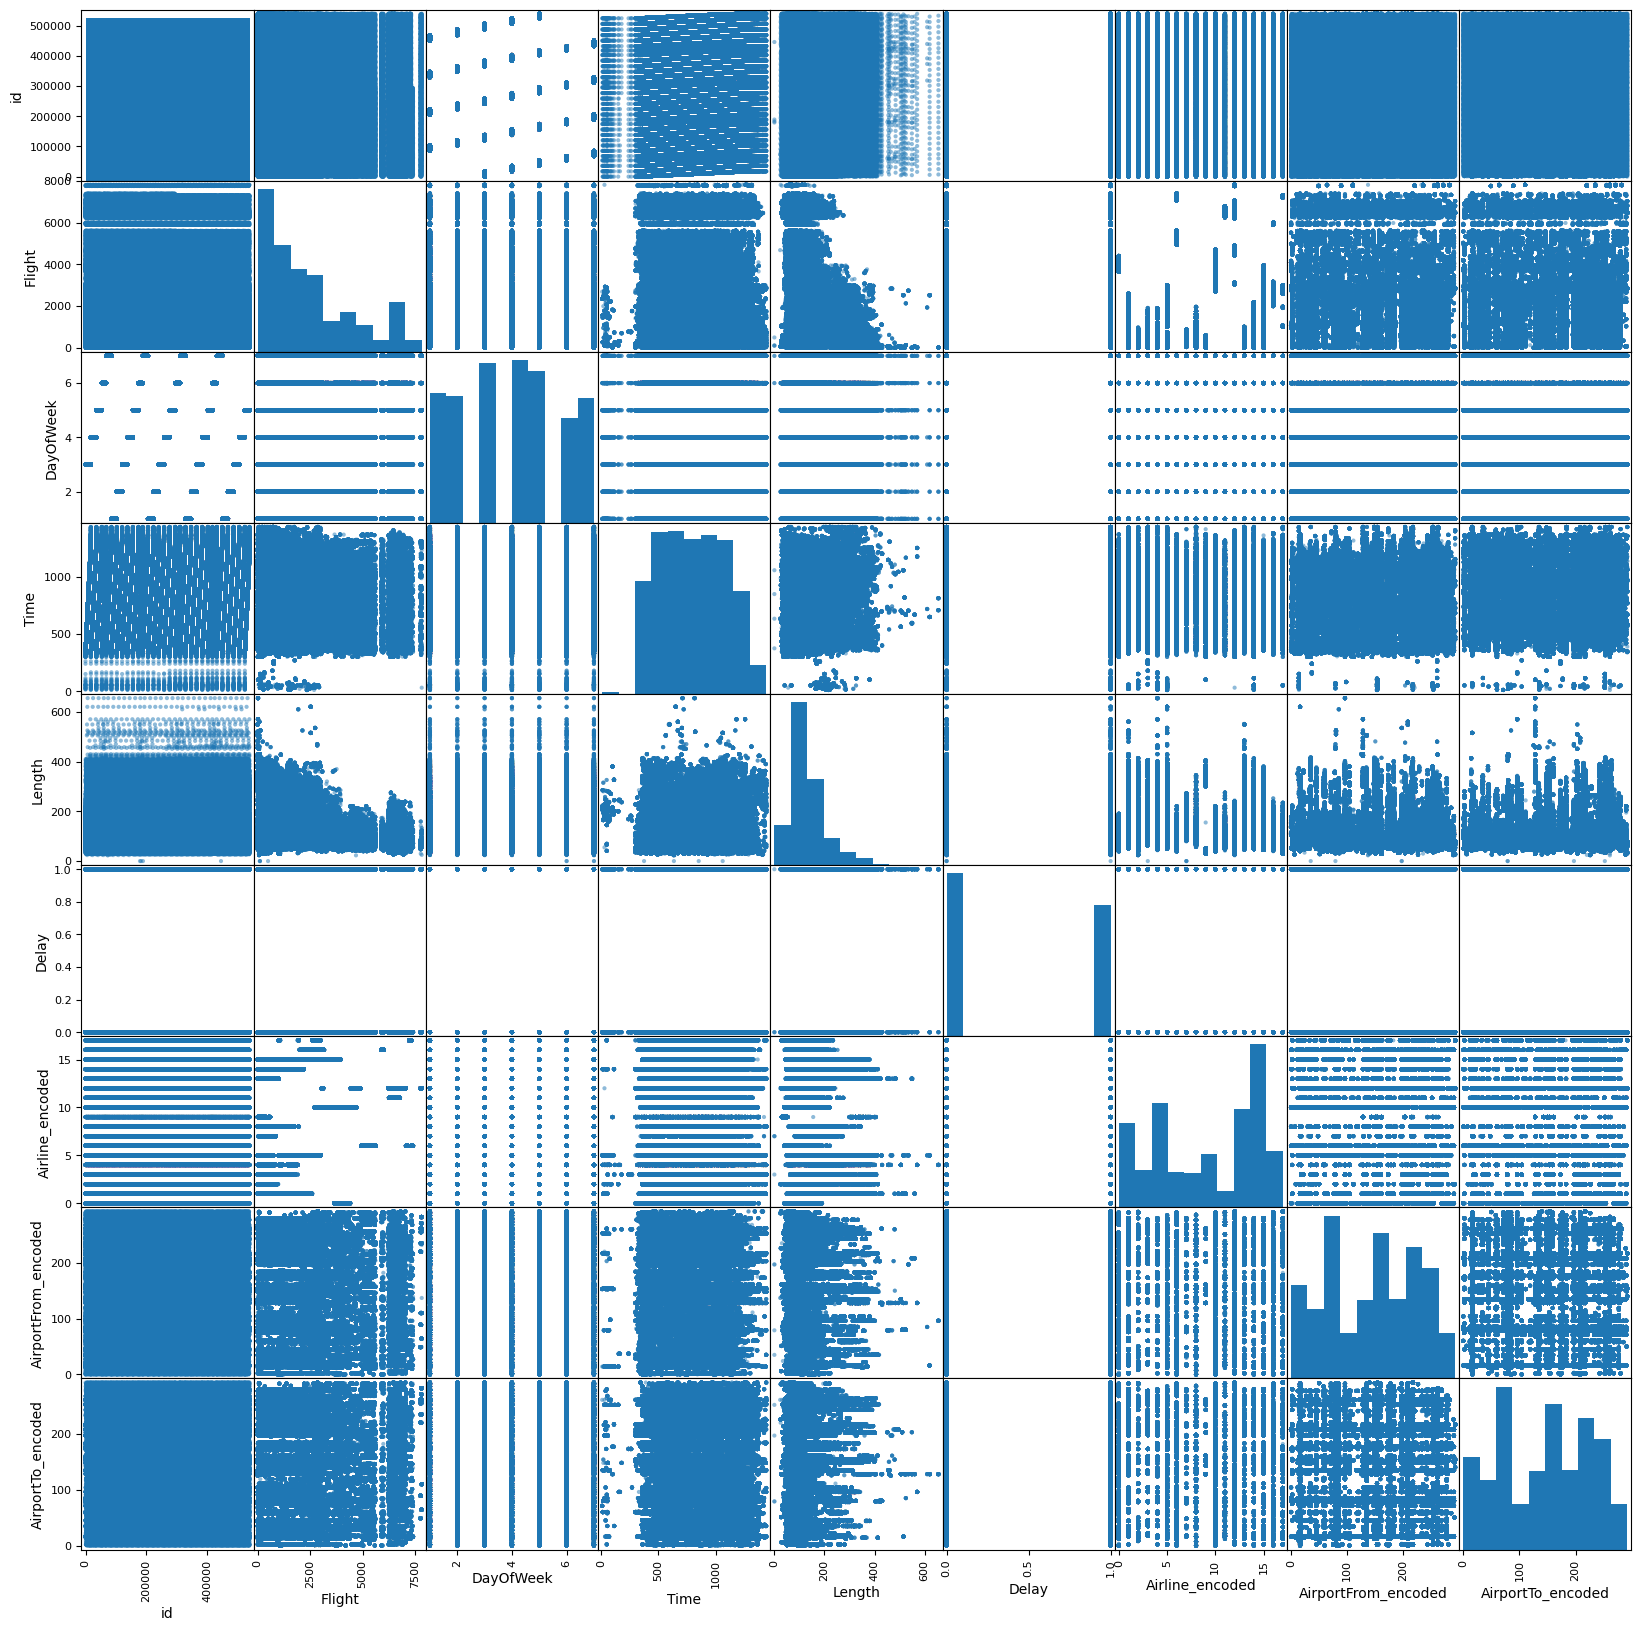

In [21]:
# Scatter plot describes values of 2 variables along the 2 axis
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20))

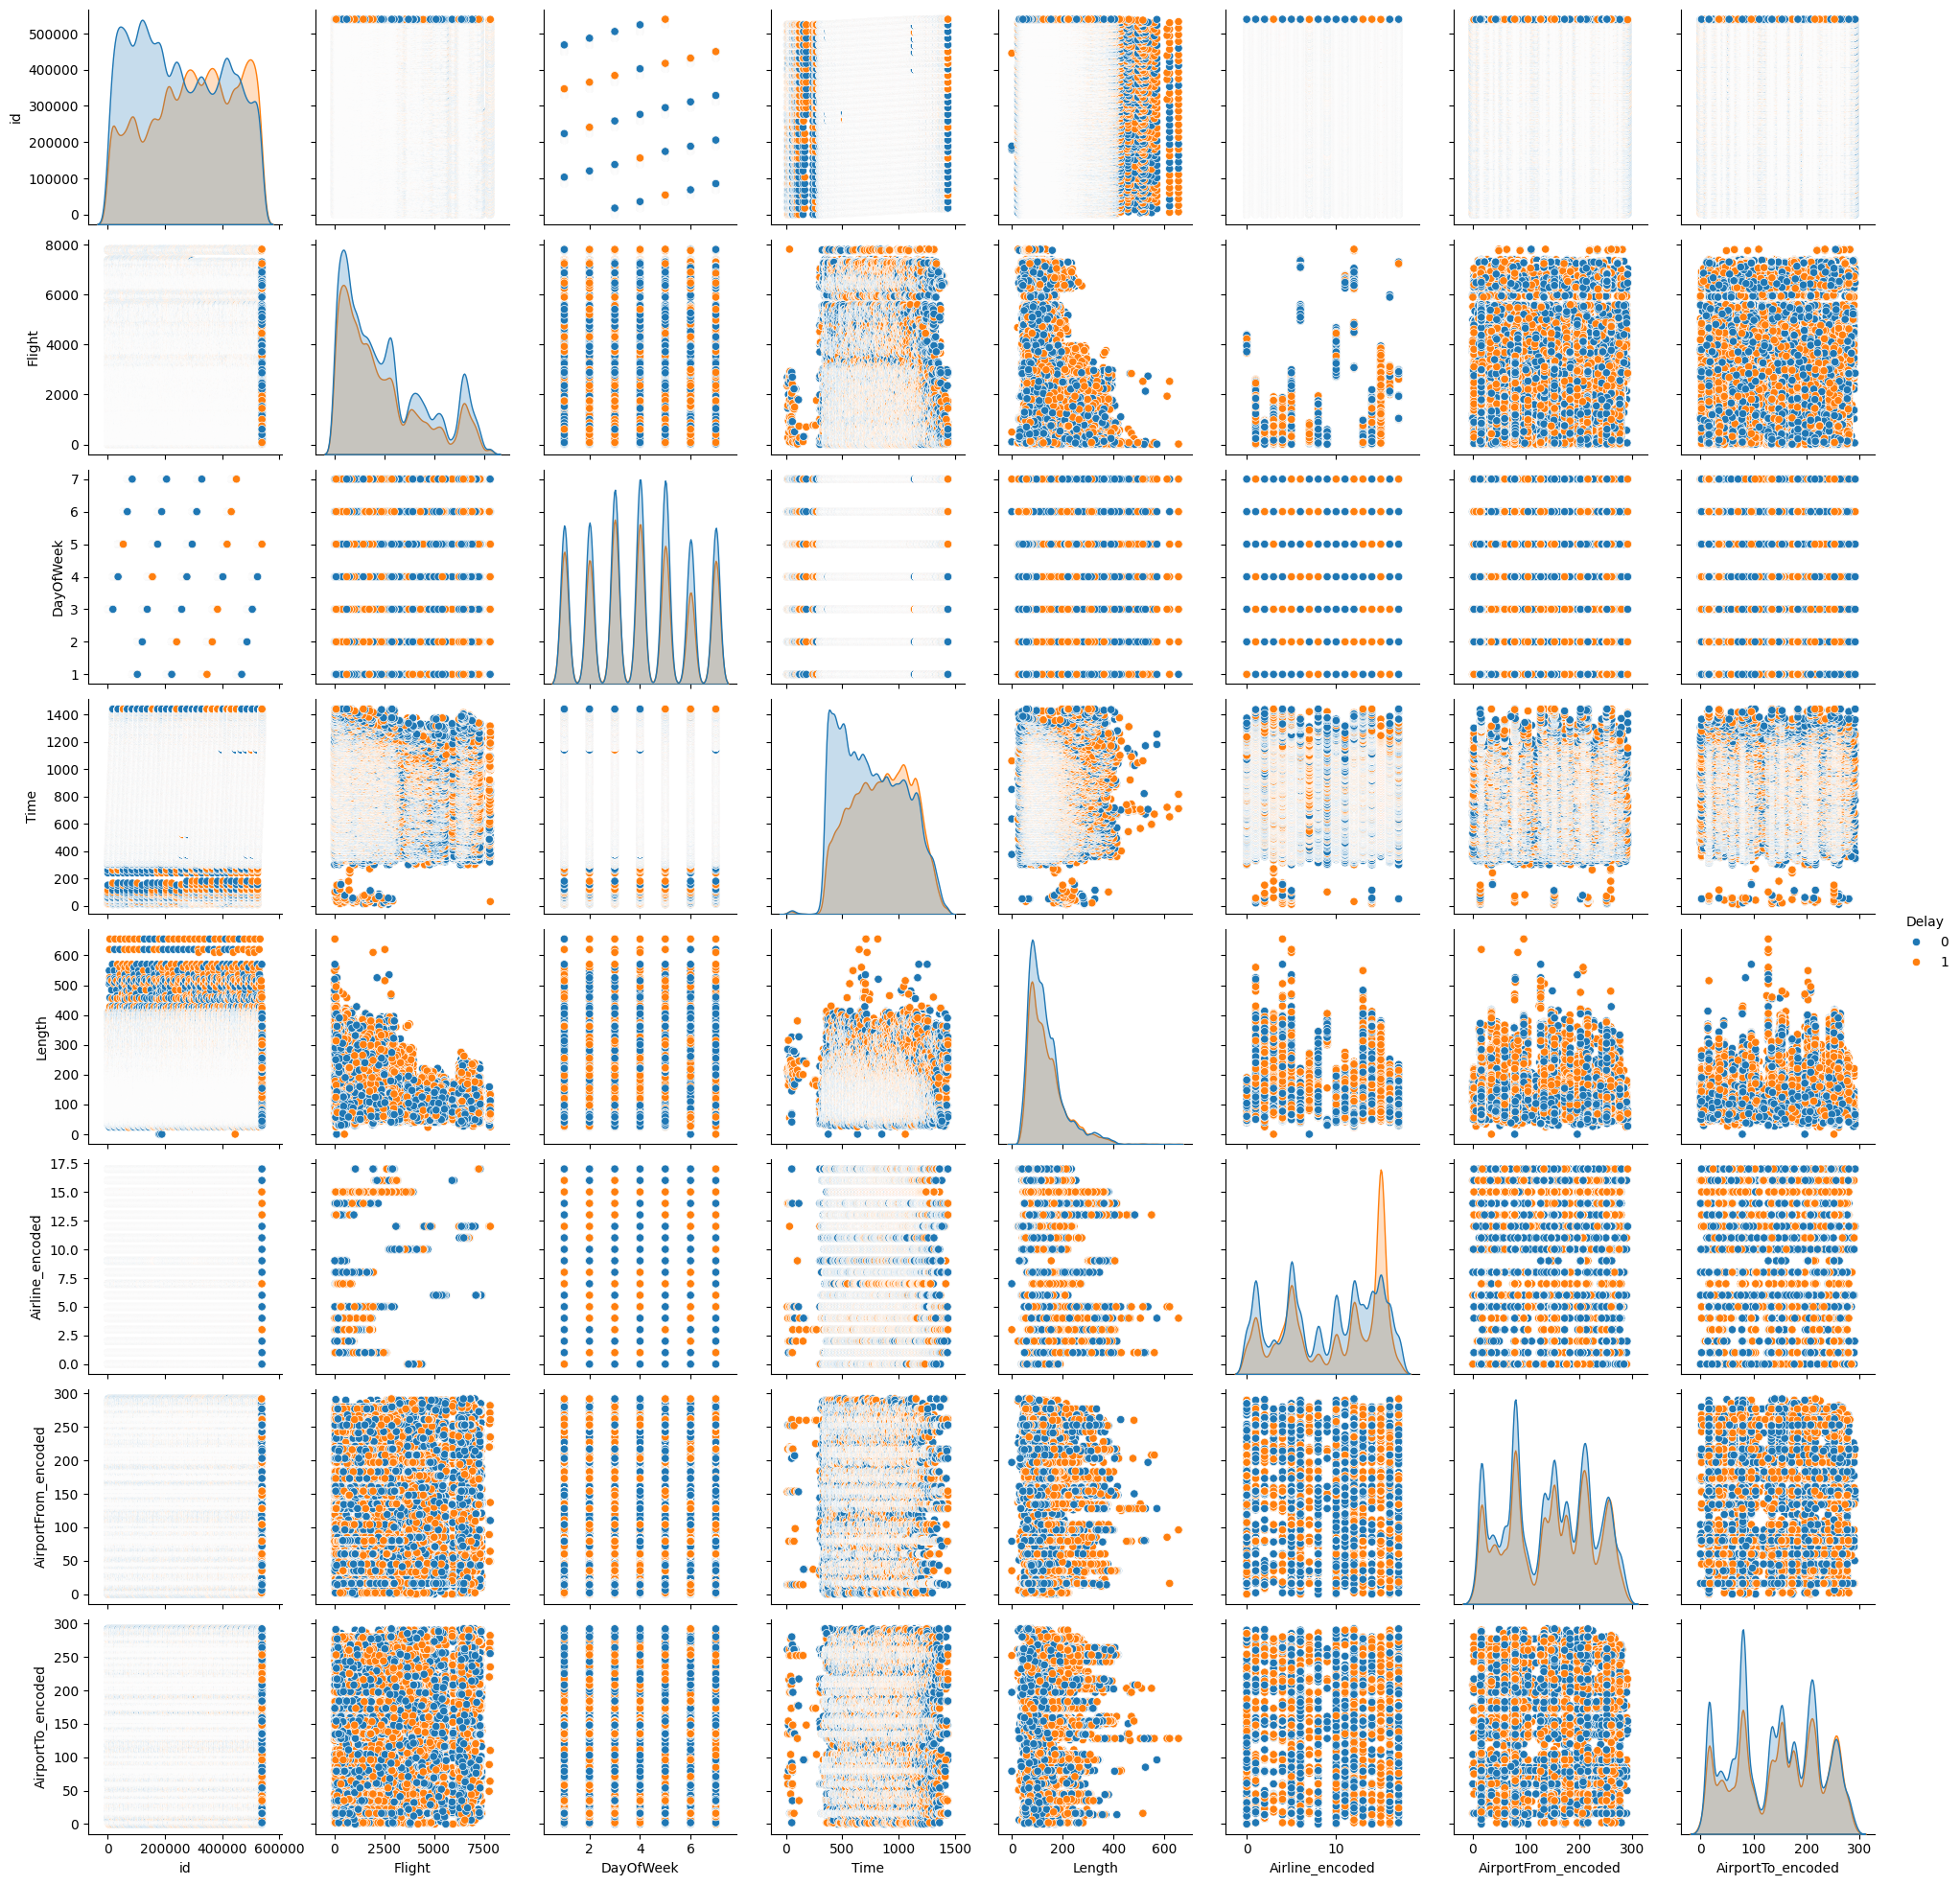

In [22]:
# pairplot is to create scatter plots between all variables
sns.pairplot(data, hue='Delay')
plt.show()

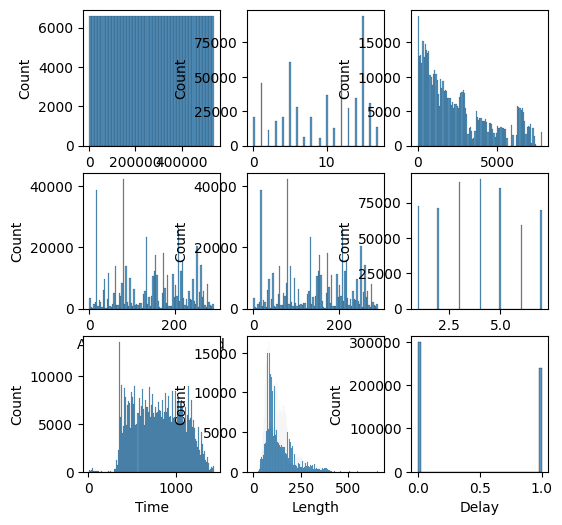

In [23]:
# histograms dusplay numeric data i.e wheter the data is normally distributed or skewed
plt.figure(figsize=(6,6))
for i, col in enumerate(['id','Airline_encoded','Flight','AirportFrom_encoded','AirportTo_encoded','DayOfWeek','Time','Length','Delay']):
        plt.subplot(3,3,i+1)
        sns.histplot(x = col, data = data)
plt.show()

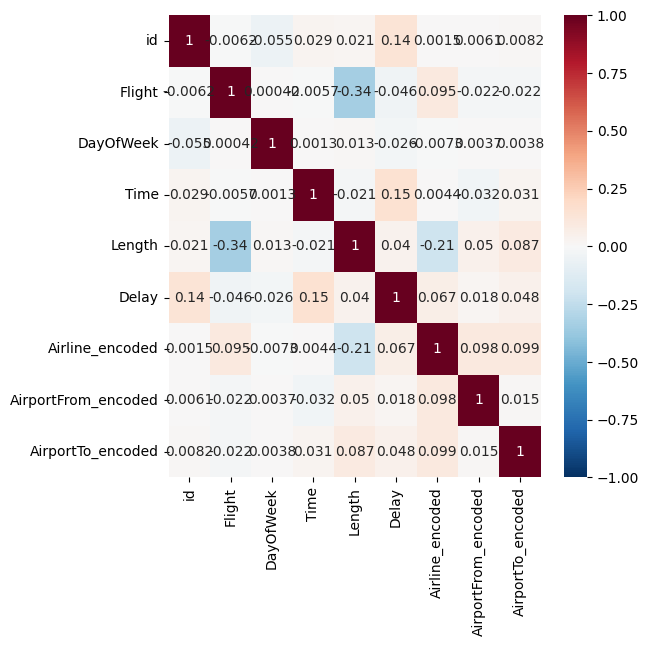

In [28]:
# heatmap is used to describe correlation between variables
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(6,6))
sns.heatmap(numeric_data.corr(),vmin=-1.0,center=0,cmap='RdBu_r',annot=True)
plt.show()

## Splitting data into x and y

In [31]:
target_name='Delay'
# seperate delay from dataset
y=data[target_name]
# seperate dependent(input features) from dataset
x=data.drop(target_name,axis=1)

In [32]:
x.head()

id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
0   1      CO     269         SFO       IAH          3    15     205   
1   2      US    1558         PHX       CLT          3    15     222   
2   3      AA    2400         LAX       DFW          3    20     165   
3   4      AA    2466         SFO       DFW          3    20     195   
4   5      AS     108         ANC       SEA          3    30     202   

   Airline_encoded  AirportFrom_encoded  AirportTo_encoded  
0                4                  253                135  
1               14                  217                 60  
2                1                  154                 80  
3                1                  253                 80  
4                2                   14                252

In [33]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Delay, dtype: int64

## Feature Engineering

In [35]:
x_numeric = x.select_dtypes(include=['number']) 

# standardscaler standardizes the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_numeric)
SSX = scaler.transform(x_numeric)

In [36]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(SSX,y,test_size=0.2,random_state=7)

In [37]:
X_test.shape,y_test.shape

((107877, 8), (107877,))

## model training

### logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,y_train)

c:\Users\CodeTantra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

### knn

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

### decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### naive bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)

# making prediction

### using logistic regression

In [ ]:
X_test.shape

In [ ]:
# prection on test dataset
lr_pred=lr.predict(X_test)

In [ ]:
lr_pred.shape

### using knn

In [ ]:
#  prediction on testdata
knn_pred=knn.predict(X_test)

In [ ]:
knn_pred.shape

### using decision tree

In [ ]:
dt_pred=dt.predict(X_test)

### using naive bayes

In [ ]:
nb_pred=nb.predict(X_test)

### using random forest

In [ ]:
rf_pred=rf.predict(X_test)

# train and test score

In [ ]:
# using logistic regression
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regreesion",lr.score(X_train,y_train)*100)
print("Accuracy (Test) score of Logistic Regression",lr.score(X_test,y_test)*100)
print("Accuracy (Test) score of Logistic Regression",accuracy_score(y_test,lr_pred)*100)

In [ ]:
#  using KNN
print("Train Accuracy of KNN",knn.score(X_train,y_train)*100)
print("Accuracy (Test) score of KNN",knn.score(X_test,y_test)*100)
print("Accuracy (Test) score of KNN",accuracy_score(y_test,knn_pred)*100)

In [ ]:
#  using Decision Tree
print("Train Accuracy of Decision Tree",knn.score(X_train,y_train)*100)
print("Accuracy (Test) score of Decision Tree",dt.score(X_test,y_test)*100)
print("Accuracy (Test) score of Decision Tree",accuracy_score(y_test,dt_pred)*100)

In [ ]:
# using Naive Bayes Clasifier
print("Train Accuracy of Naive Bayes",nb.score(X_train,y_train)*100)
print("Accuracy (Test) score of Naive Bayes",nb.score(X_test,y_test)*100)
print("Accuracy (Test) score of Naive Bayes",accuracy_score(y_test,nb_pred)*100)

In [ ]:
# using Random Forest
print("Train Accuracy of Random Forest",rf.score(X_train,y_train)*100)
print("Accuracy (Test) score of Random Forest",rf.score(X_test,y_test)*100)
print("Accuracy (Test) score ofRandom Forest",accuracy_score(y_test,rf_pred)*100)

### confusion matrix

In [ ]:
# confusion matrix is used to compare predicted values with actual values
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
# for Logistic Regression
cm=confusion_matrix(y_test,lr_pred)
cm

In [ ]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='d')

In [ ]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [ ]:
TN,FP,FN,TP

In [ ]:
# confusion matrix for Logistic Regresion
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,lr_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

In [ ]:
#confusion matrix for KNN
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,knn_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

In [ ]:
# confusion matrix for decision tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,dt_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

In [ ]:
# confusion matrix for Naive Bayes
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,nb_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_pred))

In [ ]:
# confusion matrix for Random Forest
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,rf_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))